## Eigenvalues  Laplacian on [0,1]


$\nabla^2 u = \lambda u$



In [1]:
# add parent folder path where lib folder is
import sys

sys.path.insert(0, "..")
import pylsa
from pylsa.dmsuite import laplacian_fd2
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from scipy.sparse.linalg import eigs
from timeit import default_timer as timer

# Parameters
N = 40
length = 1.0

# Rhs Matrix
I = np.eye(N)
D = laplacian_fd2(N, length)
L = np.kron(I, D) + np.kron(D, I)

### Direct EVP Solver

Elapsed time  1.256770


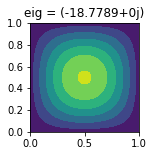

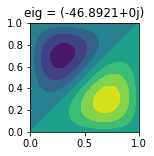

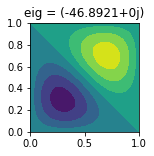

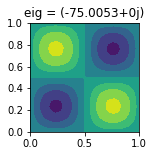

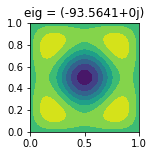

In [2]:
start = timer()
# Solve evp
eigvals, eigvecs = eig(L)
print("Elapsed time {:9.6f}".format(timer() - start))

# Sort
idx = np.abs(eigvals).argsort()
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Plot
x = np.linspace(0, 1, N)
xx, yy = np.meshgrid(x, x, indexing="ij")
for i in range(5):
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.contourf(xx, yy, np.real(eigvecs[:, i].reshape((N, N))))
    ax.set_title(r"eig = {:12.6}".format(eigvals[i]))
    ax.set_aspect(1)
    plt.show()

## Iterative EVP Solver

Elapsed time  0.319141


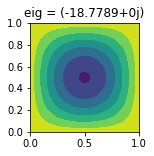

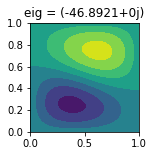

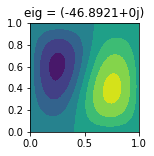

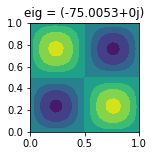

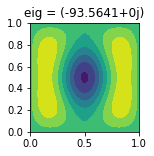

In [3]:
start = timer()
# Solve evp
# eigvals, eigvecs = eigs(L, k=5, sigma=0)
eigvals, eigvecs = eigs(L, k=5, which="LR")
print("Elapsed time {:9.6f}".format(timer() - start))

# Sort
idx = np.abs(eigvals).argsort()
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Plot
x = np.linspace(0, 1, N)
xx, yy = np.meshgrid(x, x, indexing="ij")
for i in range(5):
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.contourf(xx, yy, np.real(eigvecs[:, i].reshape((N, N))))
    ax.set_aspect(1)
    ax.set_title(r"eig = {:12.6}".format(eigvals[i]))
    plt.show()